In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lab2 import *

In [2]:
WIDTH = 120
HEIGHT = 120

**Овал Кассіні**
Рівняння кривої: $r^4 - 2a^2r^2\cos 2\phi - (b^4 - a^4) = 0$

$r^2 = a^2\cos 2\phi \pm \sqrt{a^4\cos^2 2\phi + b^4 - a^4} =$  
$ = a^2\cos 2\phi \pm \sqrt{ b^4 - a^4 (1-\cos^2 2\phi)} = $  
$ = a^2\cos 2\phi \pm \sqrt{ b^4 - a^4 \sin^2 2\phi}$  

$r = \pm\sqrt{a^2\cos 2\phi \pm \sqrt{ b^4 - a^4 \sin^2 2\phi}}$

In [3]:
def get_cardioid(a=1, b=1):
    def _cardioid(n):
        t = np.linspace(0, 2*np.pi, n)
        ct = np.cos(t)
        st = np.sin(t)
        return a*(ct**2) + b * ct, ct * st + b * st
    return _cardioid

def get_cassini(a=0, b=1):
    def _cassini(n):
        if b > a:
            phi = np.linspace(0, np.pi, n)
            a2cos2phi = a*a*np.cos(2*phi)
            root = np.sqrt(b**4 - (a**2 * np.sin(2*phi))**2)
            ans1 = np.sqrt(a2cos2phi + root)
            return [(phi, ans1), (phi+np.pi, ans1)]
        elif b < a:
            print("b/a: ", b/a)
            phi0 = np.arcsin((b/a)**2)/2
            phi_full = np.linspace(-phi0, phi0, n)
            phi = phi_full[1:-1]

            a2cos2phi = a*a*np.cos(2*phi)
            root = np.sqrt(b**4 - (a**2 * np.sin(2*phi))**2)
            ans1 = np.sqrt(a2cos2phi + root)
            ans2 = np.sqrt(a2cos2phi - root)
            ans3 = np.sqrt(a*a*np.cos(2*np.array([-phi0, phi0])))
            print("shapes: ", ans1.shape, ans3.shape)
            
            ans1_full = np.concatenate([[ans3[0]],ans1,[ans3[1]]])
            ans2_full = np.concatenate([[ans3[0]],ans2,[ans3[1]]])

            phis = [phi_full, phi_full, phi_full+np.pi, phi_full+np.pi]
            rs = [ans1_full, ans2_full, ans1_full, ans2_full]
            return list(zip(phis, rs))
        elif b == a:
            phi = np.linspace(-np.pi/4, np.pi/4, n)
            ans = 2*a*a*np.cos(2*phi) 
            return [(phi,ans), (phi+np.pi,ans)]

    return _cassini


In [4]:
T = np.linspace(0, 2*np.pi, 100)

cardioid_a = 1
cardioid_b = 1

cassini_a = 0
cassini_c = 1

cardioid = get_cardioid(cardioid_a, cardioid_b)
cassini = get_cassini(cassini_a, cassini_c)

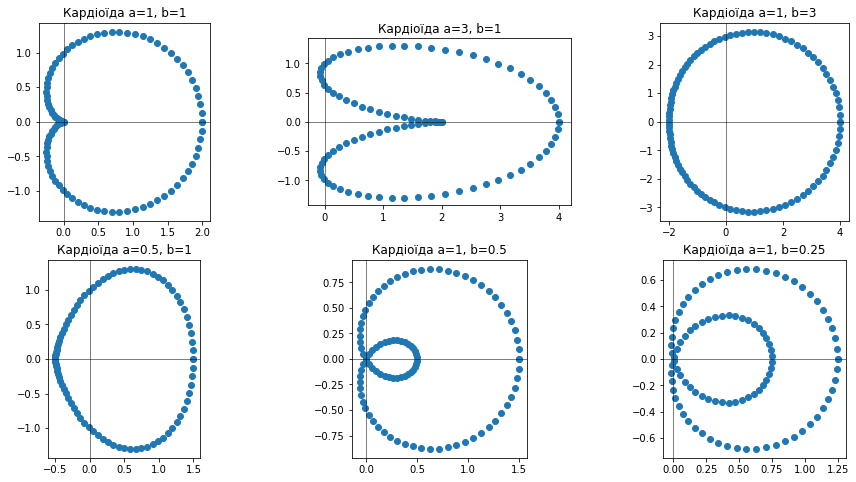

In [37]:
def demo_cardioid():
    params = [
        (1,1), (3,1), (1,3), (0.5,1), (1,0.5), (1,0.25)
    ]

    fig, axs = plt.subplots(2,3)
    for ax, (cardioid_a, cardioid_b) in zip(axs.flat, params):
        cardioid = get_cardioid(cardioid_a, cardioid_b)
        ax.scatter(*cardioid(100))
        ax.set_title(f"Кардіоїда a={cardioid_a}, b={cardioid_b}")
        ax.axhline(0, c='k', lw=0.5)
        ax.axvline(0, c='k', lw=0.5)
        ax.set_aspect(1)
    
    fig.set_size_inches((16,8))

demo_cardioid()

b/a:  0.9090909090909091
shapes:  (98,) (2,)
b/a:  0.7142857142857143
shapes:  (98,) (2,)
b/a:  0.625
shapes:  (98,) (2,)


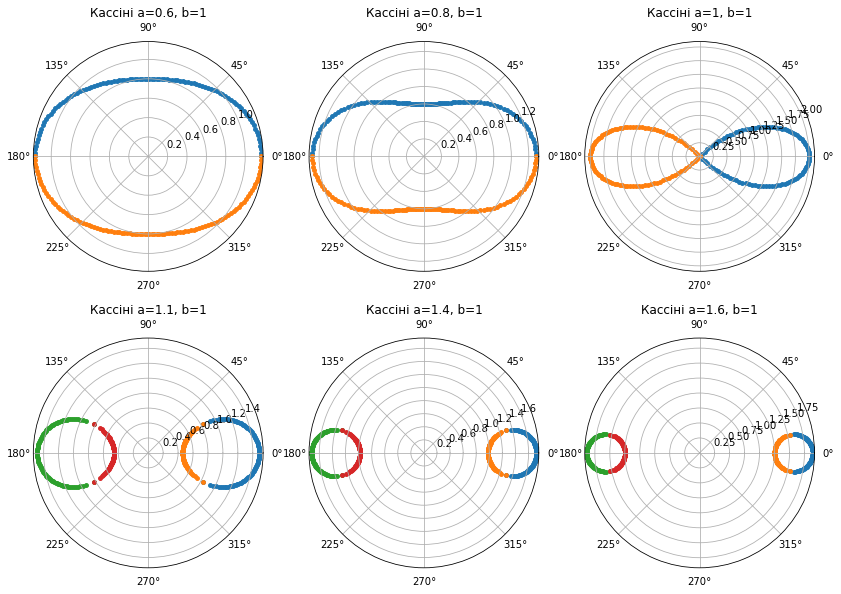

In [41]:
def demo_cassini():
    params = [
        (0.6, 1), (0.8, 1), (1,1), (1.1, 1), (1.4, 1), (1.6, 1)
    ]

    fig, axs = plt.subplots(2,3, subplot_kw={'projection': 'polar'})
    for ax, (a, b) in zip(axs.flat, params):
        oval = get_cassini(a, b)
        for block in oval(100):
            ax.scatter(*block, s=15)
        ax.set_title(f"Кассіні a={a}, b={b}")
        ax.set_aspect(1)
    
    fig.set_size_inches((14,10))

demo_cassini()

## 1

In [17]:
def plot_cardioid(a, b, N):
    cardioid = get_cardioid(a, b)

    f2p = f2p_from_xywh(WIDTH, HEIGHT, 2*(a+b), 2*(a+b), WIDTH/4, HEIGHT/2)
    canvas = np.zeros((WIDTH+1, HEIGHT+1))

    curve = build_bresenham_polygon(*cardioid(N), f2p)
    canvas = draw(canvas, curve)
    
    show(canvas)
    plt.gcf().set_size_inches((6,6))
    plt.gca().axvline(WIDTH/4, c='w', lw=1)
    plt.gca().axhline(HEIGHT/2, c='w', lw=1)

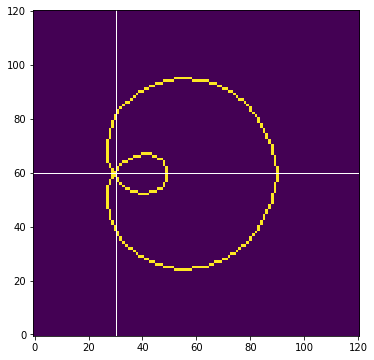

In [18]:
plot_cardioid(1,0.5,40)

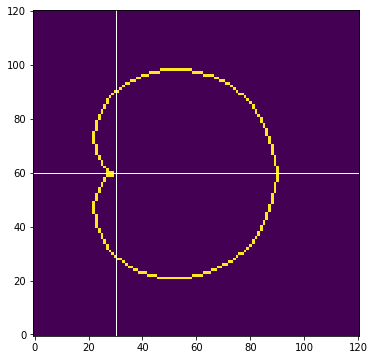

In [19]:
plot_cardioid(1,1,40)

In [20]:
def plot_oval(a, b, N):
    oval = get_cassini(a, b)
    blocks = oval(N)

    f2p = f2p_from_xywh(WIDTH, HEIGHT, 2*(a**2+b**2), 2*(a**2+b**2), WIDTH/2, HEIGHT/2)
    canvas = np.zeros((WIDTH, HEIGHT))

    for phi, r in blocks:
        xs = np.cos(phi) * r
        ys = np.sin(phi) * r
        curve = build_bresenham_polygon(xs, ys, f2p)
        canvas = draw(canvas, curve)
        
    show(canvas)
    plt.gcf().set_size_inches((6,6))
    plt.gca().axvline(WIDTH/2, c='w', lw=1)
    plt.gca().axhline(HEIGHT/2, c='w', lw=1)

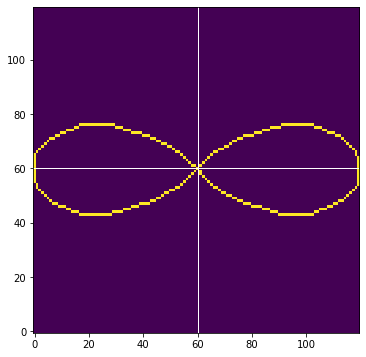

In [28]:
plot_oval(1,1,50)

b/a:  0.9166666666666667
shapes:  (48,) (2,)


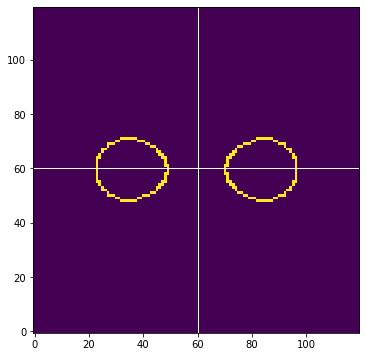

In [29]:
plot_oval(1.2,1.1,50)

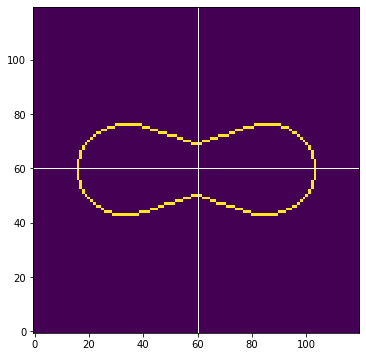

In [31]:
plot_oval(0.95,1,50)